In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np
import sys
import os
import pandas as pd
from PIL import Image, ImageEnhance
import random

### Making csv from images

In [ ]:
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image = np.array(image)/255.0
    return image


In [ ]:
train_path_notumor = "/content/drive/MyDrive/MLProject/Dataset/Training/notumor/"
train_path_glioma = "/content/drive/MyDrive/MLProject/Dataset/Training/glioma/"
train_path_meningioma = "/content/drive/MyDrive/MLProject/Dataset/Training/meningioma/"
train_path_pituitary = "/content/drive/MyDrive/MLProject/Dataset/Training/pituitary/"
train_notumor_imgs = os.listdir(train_path_notumor)
train_glioma_imgs = os.listdir(train_path_glioma)
train_meningioma_imgs = os.listdir(train_path_meningioma)
train_pituitary_imgs = os.listdir(train_path_pituitary)

print(len(train_notumor_imgs))
print(len(train_glioma_imgs))
print(len(train_meningioma_imgs))
print(len(train_pituitary_imgs))

In [ ]:
model = Xception(weights='imagenet', include_top=False)
img_base_path = "/content/drive/MyDrive/MLProject/Dataset/Training/"

In [ ]:
# Function to extract features from an image
def imgFeatures (path):
  img = image.load_img(path, target_size=(100, 100))
  img = augment_image(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model.predict(x)
  FlatFeatures = features.ravel()
  return FlatFeatures

In [ ]:
# Extracting features of all images in the class notumor
X = []
i = 0
l = len(train_notumor_imgs)
for name in train_notumor_imgs:
  i+=1
  X.append(imgFeatures(img_base_path+"notumor/"+name))
  print(i,"/",l)
df = pd.DataFrame(X)
df.to_csv("/content/drive/MyDrive/MLProject/Train_notumor_xception.csv")

In [ ]:
# Extracting features of all images in the class glioma
X1 = []
i = 0
l = len(train_glioma_imgs)
for name in train_glioma_imgs:
  i+=1
  X1.append(imgFeatures(img_base_path+"glioma/"+name))
  print(i,"/",l)

df1 = pd.DataFrame(X1)
df1.to_csv("/content/drive/MyDrive/MLProject/Train_glioma_xception.csv")

In [ ]:
# Extracting features of all images in the class meningioma
X2 = []
i = 0
l = len(train_meningioma_imgs)
for name in train_meningioma_imgs:
  i+=1
  X2.append(imgFeatures(img_base_path+"meningioma/"+name))
  print(i,"/",l)

df2 = pd.DataFrame(X2)
df2.to_csv("/content/drive/MyDrive/MLProject/Train_meningioma_xception.csv")

In [ ]:
# Extracting features of all images in the class pituitary
X3 = []
i = 0
l = len(train_pituitary_imgs)
for name in train_pituitary_imgs:
  i+=1
  X3.append(imgFeatures(img_base_path+"pituitary/"+name))
  print(i,"/",l)

df3 = pd.DataFrame(X3)
df3.to_csv("/content/drive/MyDrive/MLProject/Train_pituitary_xception.csv")

### Reading features from saved csv

In [ ]:
df_notumor = pd.read_csv('/content/drive/MyDrive/MLProject/Train_notumor_xception.csv')


In [ ]:
df_glioma = pd.read_csv('/content/drive/MyDrive/MLProject/Train_glioma_xception.csv')


In [ ]:
df_meningioma = pd.read_csv('/content/drive/MyDrive/MLProject/Train_meningioma_xception.csv')


In [ ]:
df_pituitary = pd.read_csv('/content/drive/MyDrive/MLProject/Train_pituitary_xception.csv')


In [ ]:
print(df_notumor.shape)
print(df_glioma.shape)
print(df_meningioma.shape)
print(df_pituitary.shape)

(1595, 18433)
(1321, 18433)
(1339, 18433)
(1457, 18433)


## Making Dataset

In [ ]:
# Making labels
lst1 = [0 for i in range(1595)]
lst2 = [1 for i in range(1321)]
lst3 = [2 for i in range(1339)]
lst4 = [3 for i in range(1457)]
lst = lst1+lst2+lst3+lst4
df_labels = pd.DataFrame(lst)
df_labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
5707,3
5708,3
5709,3
5710,3


In [ ]:
# Combine test data
df_combined_test = pd.DataFrame()
df_combined_test=df_combined_test.append(df_notumor,ignore_index=True)
df_combined_test=df_combined_test.append(df_glioma,ignore_index=True)
df_combined_test=df_combined_test.append(df_meningioma,ignore_index=True)
df_combined_test=df_combined_test.append(df_pituitary,ignore_index=True)

# Remove "Unnamed" column
df_combined_test = df_combined_test.loc[:, ~df_combined_test.columns.str.contains('^Unnamed')]

#Print
df_combined_test

,0,1,2,3,4,5,6,7,8,9,...,18422,18423,18424,18425,18426,18427,18428,18429,18430,18431
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.161846,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121833,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.106103,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092647,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.127156,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111891,0.0
5708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.135667,0.0
5709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111554,0.0
5710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.109983,0.0


### PCA
|params|shape|
|--|--|
|`n_components = 0.99` | 5712 rows × 587 columns|
|`n_components = 0.95` | 5712 rows × 148 columns|
|`n_components = 0.9` | 5712 rows × 56 columns|
|`n_components = 0.85` | 5712 rows × 29 columns|

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_combined_test = scaler.fit_transform(df_combined_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
pca.fit(df_combined_test)
df_combined_testN = pca.transform(df_combined_test)


In [ ]:
df_combined_testN = pd.DataFrame(df_combined_testN)
df_combined_testN

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,4.397865,-0.479349,0.085570,-2.782273,-1.564127,-0.360945,-0.437060,0.011296,1.142026,-0.740181,...,-0.156765,0.432672,-0.122490,0.537955,0.231976,0.033771,0.194862,-0.083769,-0.162188,-0.112067
1,0.691045,-0.451135,1.334649,-0.715188,-2.500593,1.234046,-0.914835,0.830886,-0.346897,0.081897,...,0.055773,0.194332,0.024339,-0.244247,-0.026252,-0.022114,-0.402678,0.351588,-0.314813,0.299563
2,7.576471,-0.582852,-0.533506,1.943950,-1.546383,2.103210,-0.344084,-1.348544,0.512420,1.965214,...,-0.120934,0.405425,0.303670,0.088514,1.807122,-0.932599,0.526642,-0.309661,-0.903335,-0.274381
3,3.929063,-4.546467,-2.093469,0.939053,1.588957,1.189987,-0.791451,-0.513339,-0.470453,2.046918,...,-0.112308,-0.115593,-1.151826,0.413109,0.114048,-0.359934,1.705747,-0.122472,0.262564,0.136885
4,-3.699554,1.347550,1.651336,0.633166,0.203360,0.818267,-0.632632,1.422433,1.115432,0.687792,...,0.099463,-0.322811,0.016716,-0.143109,-0.372524,0.577666,0.421551,0.285317,-0.157278,-0.174578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,-3.857964,0.086886,0.292367,1.458473,0.082031,0.198507,1.118556,0.232182,0.927488,-0.551502,...,-0.201623,0.002741,0.203197,0.446235,0.002701,0.231894,-0.149934,0.202935,-0.006482,-0.277768
5708,3.366470,-2.137107,-0.455573,-0.447988,-2.113779,0.207149,0.255980,0.288603,0.735419,-0.375926,...,0.034282,0.068704,0.240705,-0.066732,0.453227,0.226529,0.639116,0.068714,-0.338582,0.351296
5709,-2.347664,-0.130487,-0.865747,0.912023,0.395072,0.848960,0.184741,0.349564,-0.426397,-1.030789,...,0.030698,0.255437,-0.301388,-0.044977,0.204125,-0.199033,-0.222926,0.139037,-0.090411,-0.111909
5710,-1.580005,1.257655,-0.991269,1.588758,-1.456207,-0.065828,-0.030616,-0.095124,0.147717,-0.836596,...,0.358410,-0.174787,0.067534,0.342176,-0.138692,-0.163275,-0.273414,-0.023154,0.190549,0.099872


### Read/Write

In [ ]:
# removing zero variance features before writing
sel = VarianceThreshold(threshold=0)
df_combined_testNparray = sel.fit_transform(df_combined_test)
df_combined_test = pd.DataFrame(df_combined_testNparray)
# df_combined_testN,df_labels
df_combined_test.to_csv("/content/drive/MyDrive/MLProject/df_combined_test_resnet.csv")
df_labels.to_csv("/content/drive/MyDrive/MLProject/df_labels_resnet.csv")

In [ ]:
df_combined_test=pd.read_csv("/content/drive/MyDrive/MLProject/df_combined_test_resnet.csv")
df_labels=pd.read_csv("/content/drive/MyDrive/MLProject/df_labels_resnet.csv")

### Data Pre-processing

In [ ]:
""" Normalise """
scaler = MinMaxScaler()
scaler.fit(df_combined_test)
df_combined_test = pd.DataFrame(scaler.transform(df_combined_test))
df_combined_test


,0,1,2,3,4,5,6,7,8,9,...,18422,18423,18424,18425,18426,18427,18428,18429,18430,18431
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.493659,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.303499,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.228742,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.164795,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.328796,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256247,0.0
5708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369242,0.0
5709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254649,0.0
5710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.247179,0.0


In [ ]:
## Reducing the features using variance threshold
sel = VarianceThreshold(threshold=0)
df_combined_testNparray = sel.fit_transform(df_combined_test)
print(df_combined_testNparray)
df_combined_testN = pd.DataFrame(df_combined_testNparray)
df_combined_testN

[[0.         0.         0.         ... 0.         0.16184616 0.        ]
 [0.         0.         0.         ... 0.         0.1218332  0.        ]
 [0.         0.         0.         ... 0.         0.10610312 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.11155426 0.        ]
 [0.         0.         0.         ... 0.         0.10998261 0.        ]
 [0.         0.         0.         ... 0.         0.14432788 0.        ]]


,0,1,2,3,4,5,6,7,8,9,...,3891,3892,3893,3894,3895,3896,3897,3898,3899,3900
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.325175,0.0,0.0,0.0,0.0,0.0,0.0,0.161846,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.268010,0.0,0.0,0.0,0.0,0.0,0.0,0.121833,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029327,0.0,0.0,...,0.0,0.346005,0.0,0.0,0.0,0.0,0.0,0.0,0.106103,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.302478,0.0,0.0,0.0,0.0,0.0,0.0,0.092647,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.291661,0.0,0.0,0.0,0.0,0.0,0.0,0.127156,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.275040,0.0,0.0,0.0,0.0,0.0,0.0,0.111891,0.0
5708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.294395,0.0,0.0,0.0,0.0,0.0,0.0,0.135667,0.0
5709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.275856,0.0,0.0,0.0,0.0,0.0,0.0,0.111554,0.0
5710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.247822,0.0,0.0,0.0,0.0,0.0,0.0,0.109983,0.0


### Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_combined_testN,df_labels,test_size=0.25,random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4284, 29)
(4284, 1)
(1428, 29)
(1428, 1)


In [ ]:
#For printing reports for the model
def print_reports(model):
  predictedy_test=model.predict(X_test)
  conf_mat = confusion_matrix(y_test, predictedy_test)
  acc_scr = accuracy_score(y_test, predictedy_test)
  print("Accuracy Score = ",acc_scr)
  print("clf rprt =\n",classification_report(y_test,predictedy_test))
  print("\nConfusion Matrix")
  disp=ConfusionMatrixDisplay(conf_mat)
  disp.plot()

### Decision tree clf

|params|accuracy|
|--|--|
|Normalized, var thresh = 0.01|0.6715686274509803|
|var thresh = 0|0.6827731092436975|
|var thresh = 0.01|0.3158263305322129|
|PCA 0.99|0.6141456582633054|
|PCA 0.95|0.6204481792717087|
|PCA 0.9|0.6554621848739496|
|PCA 0.85|0.6526610644257703|

Accuracy Score =  0.6526610644257703
clf rprt =
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       408
           1       0.58      0.60      0.59       332
           2       0.48      0.51      0.49       328
           3       0.74      0.73      0.73       360

    accuracy                           0.65      1428
   macro avg       0.65      0.65      0.65      1428
weighted avg       0.66      0.65      0.65      1428


Confusion Matrix


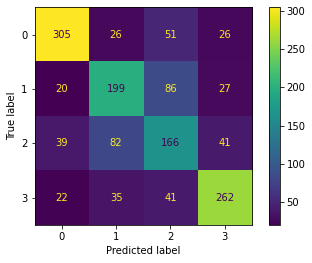

In [ ]:
#Create an instance of decision tree classifier
clf_dt = DecisionTreeClassifier(random_state=0)

#fit the model
clf_dt.fit(X_train,y_train.values.ravel())

#print report
print_reports(clf_dt)

### Random Forest

|params|accuracy|
|--|--|
|Normalized, var thresh = 0.01|0.8158263305322129|
|var thresh = 0|0.8102240896358543|
|var thresh = 0.01|0.34523809523809523|
|PCA 0.99|0.7941176470588235|
|PCA 0.95|0.8067226890756303|
|PCA 0.9|0.8102240896358543|
|PCA 0.85|0.8046218487394958|

Accuracy Score =  0.8046218487394958
clf rprt =
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       408
           1       0.76      0.69      0.72       332
           2       0.71      0.61      0.65       328
           3       0.81      0.94      0.87       360

    accuracy                           0.80      1428
   macro avg       0.79      0.79      0.79      1428
weighted avg       0.80      0.80      0.80      1428


Confusion Matrix


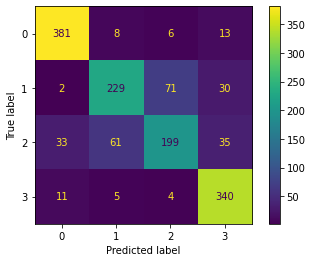

In [ ]:
#Create an instance of random forest classifier
clf_rf = RandomForestClassifier(random_state=0)

#fit the model
clf_rf.fit(X_train,y_train.values.ravel())

#Print report
print_reports(clf_rf)

|params|accuracy|
|--|--|
|Normalized, var thresh = 0.01|0.8158263305322129|
|var thresh = 0|0.8130252100840336|
|var thresh = 0.01|0.3382352941176471|
|PCA 0.95|**0.8263305322128851**|
|PCA 0.9|0.8172268907563025|
|PCA 0.99|0.8032212885154062|
|PCA 0.85|0.8018207282913166|

Accuracy Score =  0.8018207282913166
clf rprt =
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       408
           1       0.75      0.71      0.73       332
           2       0.72      0.58      0.64       328
           3       0.80      0.94      0.87       360

    accuracy                           0.80      1428
   macro avg       0.79      0.79      0.79      1428
weighted avg       0.80      0.80      0.80      1428


Confusion Matrix


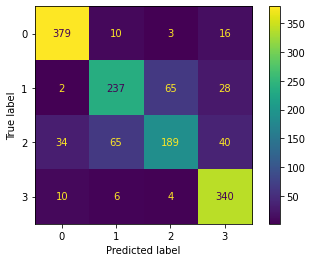

In [ ]:
#Create an instance of random forest classifier
clf_rf1 = RandomForestClassifier(random_state=0,criterion='entropy',n_estimators=220)

#fit the model
clf_rf1.fit(X_train,y_train.values.ravel())

#Print report
print_reports(clf_rf1)

### SVM

|params|accuracy|
|---|---|
|Normalized, var thresh = 0.01|**0.8452380952380952**|
|var thresh = 0|0.8011204481792717|
|var thresh = 0.01|0.36834733893557425|
|PCA 0.95|0.8046218487394958|
|PCA 0.9|0.7724089635854342|
|PCA 0.99|**0.8298319327731093**|
|PCA 0.85|0.7443977591036415|



Accuracy Score =  0.7443977591036415
clf rprt =
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       408
           1       0.64      0.68      0.66       332
           2       0.60      0.46      0.52       328
           3       0.77      0.89      0.83       360

    accuracy                           0.74      1428
   macro avg       0.73      0.73      0.73      1428
weighted avg       0.74      0.74      0.74      1428


Confusion Matrix


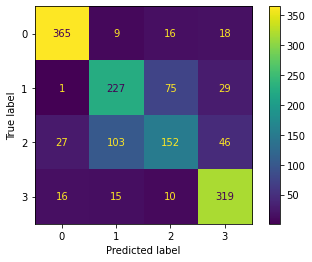

In [ ]:
#Create an instance of svm
svm_model1 = SVC(kernel = "linear", C=2.2)

#fit the model
svm_model1.fit(X_train,y_train.values.ravel())

#Print report
print_reports(svm_model1)

### ExtraTreesClassifier


|params|accuracy|
|---|---|
|Normalized, var thresh = 0.01|0.8270308123249299|
|var thresh = 0|0.8277310924369747|
|var thresh = 0.01|0.33613445378151263|
|PCA 0.99|0.7857142857142857|
|PCA 0.95|0.8242296918767507|
|PCA 0.9|**0.8319327731092437**|
|PCA 0.85|0.8179271708683473|

Accuracy Score =  0.8179271708683473
clf rprt =
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       408
           1       0.78      0.73      0.75       332
           2       0.73      0.62      0.67       328
           3       0.83      0.95      0.89       360

    accuracy                           0.82      1428
   macro avg       0.81      0.81      0.81      1428
weighted avg       0.81      0.82      0.81      1428


Confusion Matrix


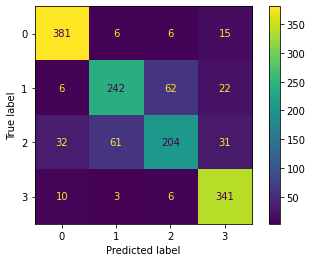

In [ ]:
#Create an instance of Extra Trees Classifier
ExtraTreesClassifier_m = ExtraTreesClassifier()

#fit the model
ExtraTreesClassifier_m.fit(X_train,y_train.values.ravel())

#Print Report
print_reports(ExtraTreesClassifier_m)

### AdaBoostClassifier


|params|accuracy|
|---|---|
|Normalized, var thresh = 0.01|0.696078431372549|
|var thresh = 0|0.6750700280112045|
|var thresh = 0.01|0.37184873949579833|
|PCA 0.99|0.657563025210084|
|PCA 0.95|0.6526610644257703|
|PCA 0.9|0.6736694677871149|
|PCA 0.85|0.657563025210084|

Accuracy Score =  0.657563025210084
clf rprt =
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       408
           1       0.56      0.66      0.61       332
           2       0.47      0.36      0.41       328
           3       0.70      0.75      0.72       360

    accuracy                           0.66      1428
   macro avg       0.64      0.65      0.64      1428
weighted avg       0.65      0.66      0.65      1428


Confusion Matrix


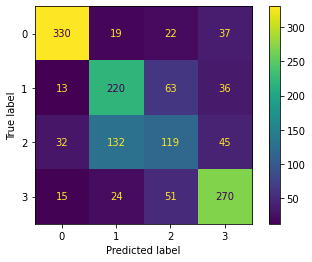

In [ ]:
#Create an instance of AdaBoost
AdaBoostClassifier_model = AdaBoostClassifier()

#fit the model
AdaBoostClassifier_model.fit(X_train,y_train.values.ravel())

#Print report
print_reports(AdaBoostClassifier_model)

### Naïve Bayes

|params|accuracy|
|---|---|
|Normalized, var thresh = 0.01|0.484593837535014|
|var thresh = 0|0.4957983193277311|
|var thresh = 0.01|0.37324929971988796|
|PCA 0.95|0.4880952380952381|
|PCA 0.9|0.542016806722689|
|PCA 0.99|0.39985994397759106|
|PCA 0.85|0.5791316526610645|

Accuracy Score =  0.5791316526610645
clf rprt =
               precision    recall  f1-score   support

           0       0.72      0.57      0.64       408
           1       0.46      0.75      0.57       332
           2       0.49      0.30      0.37       328
           3       0.69      0.68      0.69       360

    accuracy                           0.58      1428
   macro avg       0.59      0.58      0.57      1428
weighted avg       0.60      0.58      0.57      1428


Confusion Matrix


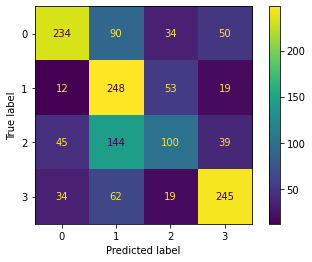

In [ ]:
#Create an instance of Gaussian Naive Bayes
GaussianNB_model = GaussianNB()

#fit the model
GaussianNB_model.fit(X_train,y_train.values.ravel())

#Print report
print_reports(GaussianNB_model)

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
svm_model1 = SVC(kernel = "linear", C=2.2)
clf_rf1 = RandomForestClassifier(random_state=0,criterion='entropy',n_estimators=220)
AdaBoostClassifier_model = AdaBoostClassifier()


In [ ]:
print("SVM vs Guassian")
t, p = paired_ttest_5x2cv(estimator1=AdaBoostClassifier_model, estimator2=svm_model1, X=df_combined_testN, y=df_labels.to_numpy().ravel(),scoring = "accuracy", random_seed=42)
print(f"t statistic: {t}, p-value: {p}\n")

if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')
 
print("SVM vs Guassian")
t, p = paired_ttest_5x2cv(estimator1=clf_rf1, estimator2=svm_model1, X=df_combined_testN, y=df_labels.to_numpy().ravel(),scoring = "accuracy", random_seed=42)
print(f"t statistic: {t}, p-value: {p}\n")

if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

SVM vs Guassian
t statistic: -14.350595712911653, p-value: 2.962244290448554e-05

Difference between mean performance is probably real
SVM vs Guassian
t statistic: 0.352103945160203, p-value: 0.7391147745086233

Algorithms probably have the same performance
